# Classification. Logistic Regression & SVM model

Цель практики: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.\
Описание задания:\
Необходимо решить задачу классификации физических лиц по уровню дохода. Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K.  Бинарная классификация. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д.\
Результат: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.

In [26]:
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt 

In [27]:
df = pd.read_csv("D:/GITHUB/ML_lessons/Datasets/adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [29]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


###### Проверяем категореальные колонки на корректность данных

In [30]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [31]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [32]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [33]:
# Очищаем датафрейм от строк с отсутствующими данными
df = df.loc[(df['workclass']!='?') & (df['occupation']!='?') & (df['native-country']!='?')]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


#### Построим гистограммы числовых параметров

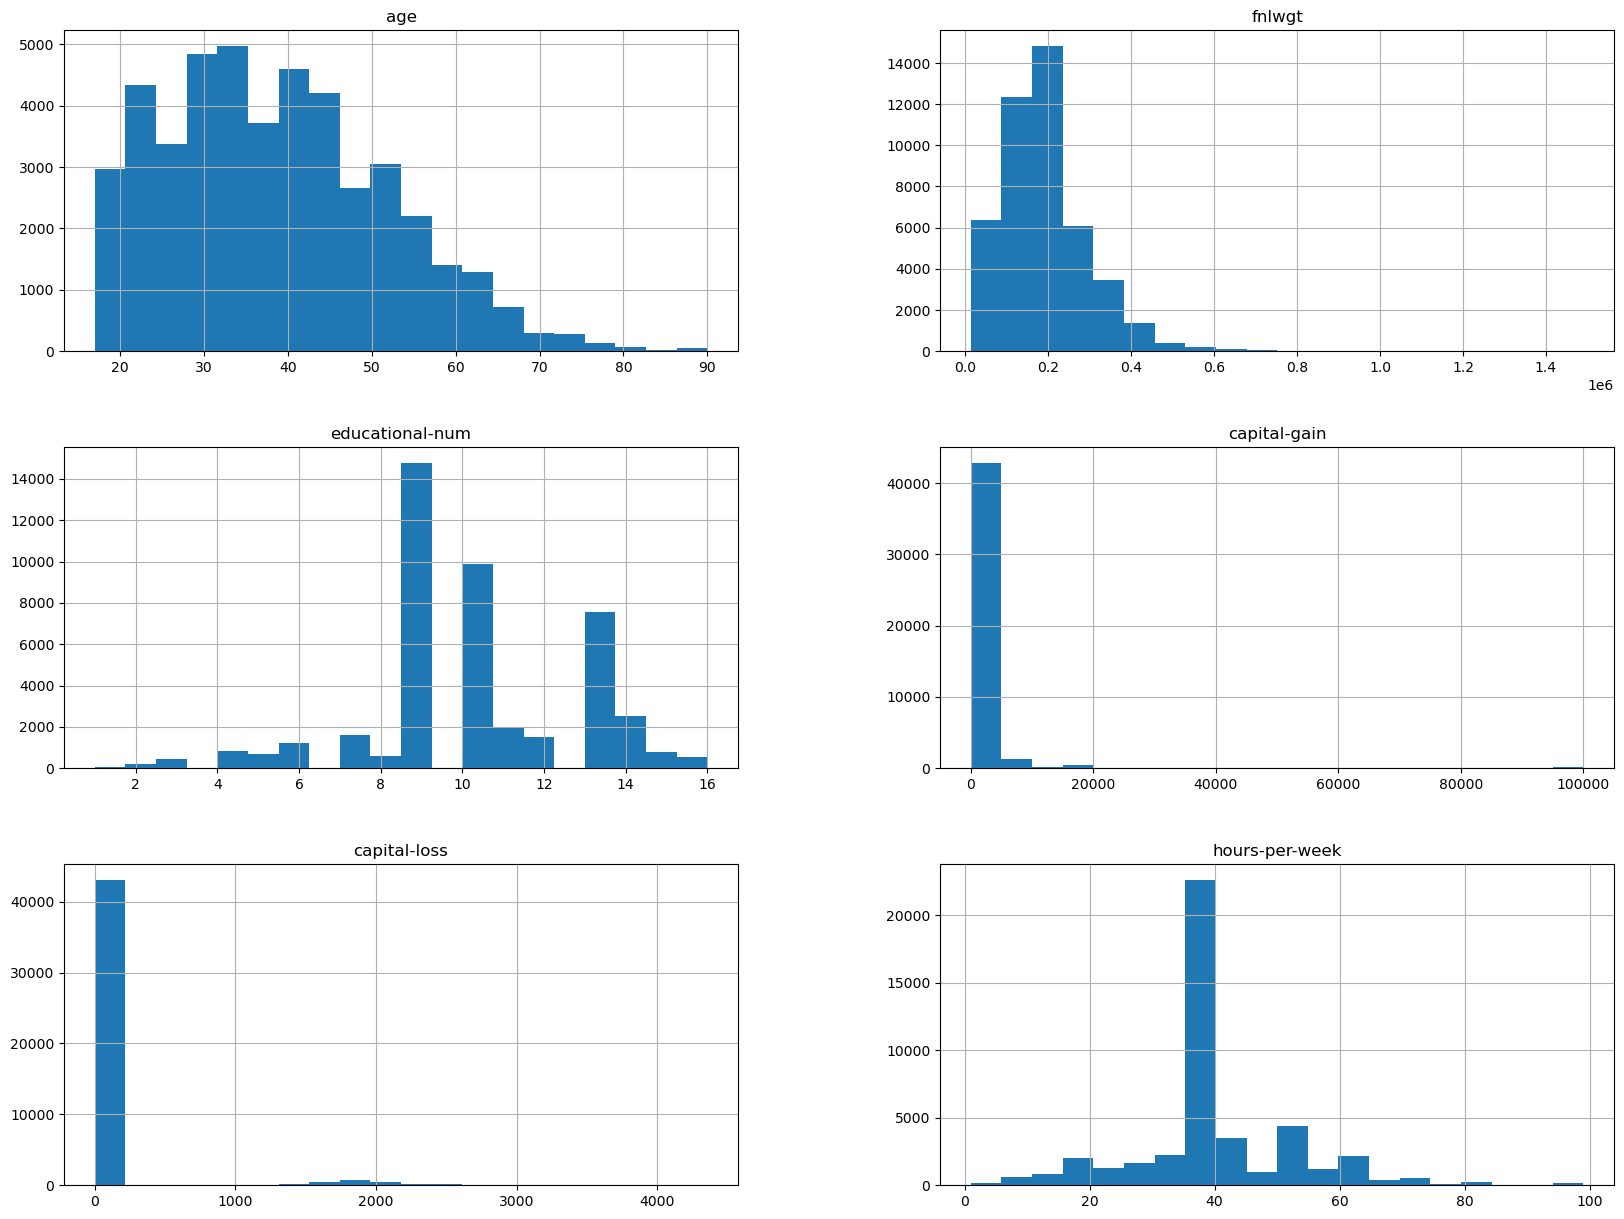

In [35]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

 #### Рассмотрим влияние некоторых числовых параметров на уровень дохода

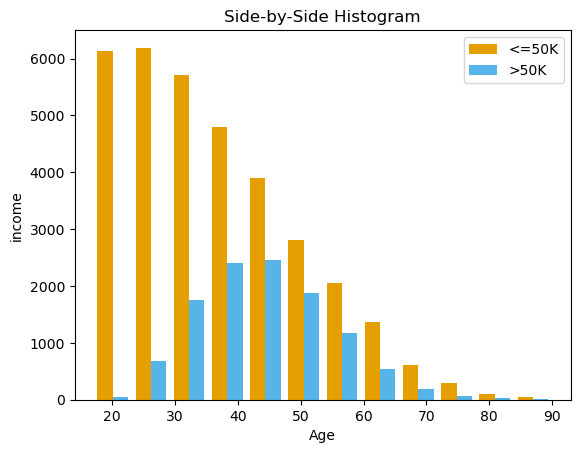

In [36]:
x1 = list(df[df['income'] == '<=50K']['age'])
x2 = list(df[df['income'] == '>50K']['age'])

colors = ['#E69F00', '#56B4E9']
names = ['<=50K', '>50K']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Age')
plt.ylabel('income')
plt.title('Side-by-Side Histogram')
plt.show()

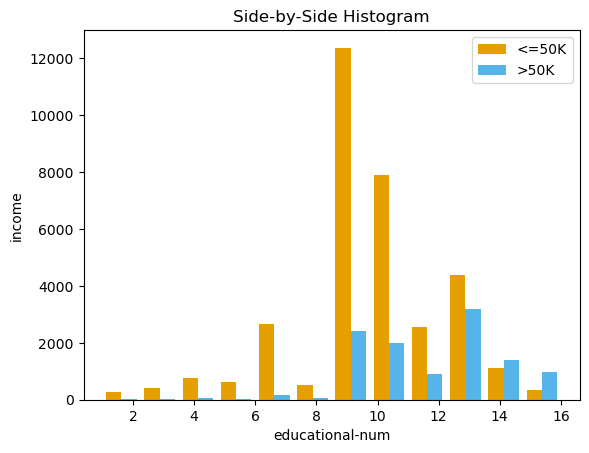

In [37]:
x1 = list(df[df['income'] == '<=50K']['educational-num'])
x2 = list(df[df['income'] == '>50K']['educational-num'])

colors = ['#E69F00', '#56B4E9']
names = ['<=50K', '>50K']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('educational-num')
plt.ylabel('income')
plt.title('Side-by-Side Histogram')
plt.show()


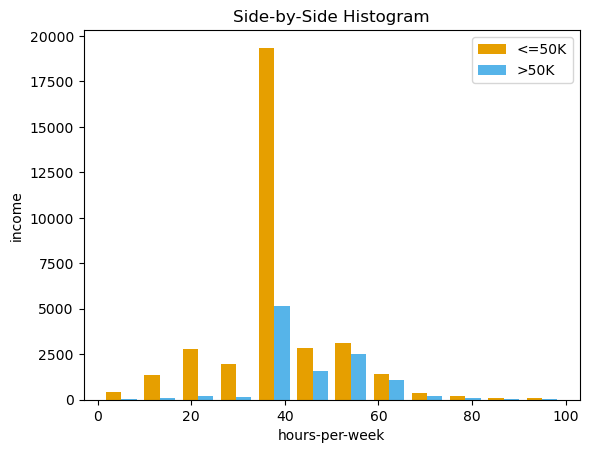

In [38]:
x1 = list(df[df['income'] == '<=50K']['hours-per-week'])
x2 = list(df[df['income'] == '>50K']['hours-per-week'])

colors = ['#E69F00', '#56B4E9']
names = ['<=50K', '>50K']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('hours-per-week')
plt.ylabel('income')
plt.title('Side-by-Side Histogram')
plt.show()

Четко прослеживается зависимость увеличения дохода в зависимости от возраста: в активной фазе жизни (от 30-ти до 55) люди зарабатывают больше. Также видна четкая зависимость от уровня образования. От количества часов работы в неделю зависимость не слишком явная. Не будем этот критерий использовать в модели. 

In [39]:
from sklearn.linear_model import LogisticRegression

#### Выберем данные для модели .

In [40]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [41]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [42]:
X = pd.get_dummies(df.loc[:, ['age', 'workclass', 'educational-num', 'occupation', 'relationship',\
                              'race', 'gender', 'native-country']])

In [43]:
X.head()

,age,educational-num,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
# целевая переменная (столбец income) является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
le.fit(df['income'])

LabelEncoder()

In [46]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [47]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series(data=le.transform(df['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [48]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

#### Обучим модель .
Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [51]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 1, 0, 0])

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [52]:
model.score(X_train, y_train)

0.8267683887552865

In [53]:
model.score(X_test,y_test)

0.8290768380320619

### Обучим модель по методу опорных Векторов SVM

In [54]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [55]:
clf.score(X_train, y_train)

0.8293943665865052

In [56]:
clf.score(X_test, y_test)

0.8233278054173576

#### Сравнивая две модели: точность предсказания сопоставимая. Модель SVM затрачивает больше ресурсов (вычислительная мощность, время) 

### Попробуем повысить точность предсказания, добавив в выборку дополнительные параметры

In [57]:
X = pd.get_dummies(df.loc[:, ['age', 'workclass', 'educational-num', 'occupation', 'marital-status','relationship',\
                              'race', 'gender','capital-gain', 'capital-loss', 'native-country']])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [60]:
model.score(X_train, y_train)

0.8461729828343976

In [61]:
model.score(X_test,y_test)

0.8476506357103372

#### Подтвердилась гипотеза, что время работы в неделю не сильно влияет на уровень дохода: при добавлении критерия 'hours-per-week' точность предсказания меняется незначительно. 

#### Повысить точность предсказания 1,7% удалось при добавлении критериев: 'marital-status', 'capital-gain', 'capital-loss'

# Loss functions and optimization

Цель практики: изучить применение методов оптимизации для решения задачи классификации
1. Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.
2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.
3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.
4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).
5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).
6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [62]:
import pandas as pd
import numpy as np
import scipy.stats 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [63]:
from sklearn.datasets import load_iris

In [64]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [65]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
# Формируем датафрейм, искдючаем таргет = 0 'sertosa', преобразуем признаки из 1 и 2 в 0 и 1
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']) 
df_iris = df_iris[(df_iris['target'] !=0)]
df_iris['target'][(df_iris['target'] ==1)] = 0
df_iris['target'][(df_iris['target'] ==2)] = 1

In [68]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0.0
51,6.4,3.2,4.5,1.5,0.0
52,6.9,3.1,4.9,1.5,0.0
53,5.5,2.3,4.0,1.3,0.0
54,6.5,2.8,4.6,1.5,0.0


In [69]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [70]:
X = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_iris['target']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Реализация Логистической Регрессии Градиентный спуск

In [72]:
# Расчёт логистической функции
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [73]:
# Расчёт функции потерь на основе бинарной кросс-энтропии
def loss(predict, y):
    return ((-y) * np.log(predict) - (1 - y) * np.log(1 - predict)).mean()

In [74]:
def transposition(X):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    return X

In [75]:
# Предсказание вероятности
def predict_proba(X, theta, fit_intercept=True):
    if len(theta) - 1 == X.shape[1]:
        transposition(X)
    z = np.dot(X, theta)
    return sigmoid(z)

In [76]:
# Предсказание класса на основе вероятностей
def predict(prediction_proba, rate=0.5):
    return np.asarray([0 if x < rate else 1 for x in prediction_proba])

In [77]:
# Градиентный спуск
def lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    for i in range(max_iter):

        prediction = predict_proba(X, theta) # Предсказание значений
        gradient = np.dot(X.T, (prediction - y)) / y.size # Рассчёт градиента
        theta -= learning_rate * gradient # Сдвиг оценки коэффициентов
        
        preds.append(prediction)
        costs.append(loss(prediction, y))
        
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction

In [78]:
import time

In [79]:
start_time = time.time()
hand_model = lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
end_time = time.time() - start_time
hand_predict = predict(predict_proba(X_test,hand_model[0]))
hand_score = accuracy_score(y_test, hand_predict)
print(f'Время работы градиентный спуск = {end_time:.3f}')
print(f'Точность предсказания = {hand_score}')

Время работы градиентный спуск = 0.068
Точность предсказания = 0.95


### Логистическая регрессия метод скользящего среднего (Root Mean Square Propagation, RMSProp)

In [80]:
def rmsprop_lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001, decay_rate=0.9):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    
    cache=np.zeros(X.shape[1])
    caches=[]
    for i in range(max_iter):
        prediction = predict_proba(X,theta)
        gradient = np.dot(X.T, (prediction - y)) / y.size
        
        cache = decay_rate * cache+ (1 - decay_rate) * gradient**2
        caches.append(cache)
       
        theta += -learning_rate * gradient / (np.sqrt(cache) + eps)
       
        preds.append(prediction)
        costs.append(loss(prediction, y))
       
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction, caches

In [81]:
start_time = time.time()
rmsprop_model = rmsprop_lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
rmsprop_end_time = time.time() - start_time
rmsprop_predict = predict(predict_proba(X_test, rmsprop_model[0]))
rmsprop_score = accuracy_score(y_test, rmsprop_predict)
print(f'Время работы реализации RMSProp = {rmsprop_end_time:.3f}')
print(f'Точность предсказания = {rmsprop_score}')

Время работы реализации RMSProp = 0.067
Точность предсказания = 0.85


### Логистическая регрессия по Нестерову метод адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam)

In [82]:
def nadam_lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001, gamma=0.9):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    v=0
    vs=[]
    for i in range(max_iter):
        prediction=predict_proba(X, theta)
        gradient = np.dot(X.T, (prediction - y)) / y.size
        v = gamma * v - learning_rate * gradient
        
        vs.append(v)
        theta += v
        
        preds.append(prediction)
        costs.append(loss(prediction, y))
       
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction, vs

In [83]:
start_time = time.time()
nadam_model = nadam_lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
nadam_end_time = time.time() - start_time
nadam_predict = predict(predict_proba(X_test, nadam_model[0]))
nadam_score = accuracy_score(y_test, nadam_predict)
print(f'Время работы реализации NADAM = {nadam_end_time:.3f}')
print(f'Точность предсказания = {nadam_score}')

Время работы реализации NADAM = 0.060
Точность предсказания = 0.9


### Логистическая регрессия библиотека Sklearn

In [84]:
lr = LogisticRegression(max_iter=100, tol=0.05)

In [85]:
start_time = time.time()
lr.fit(X_train, y_train)
lib_end_time = time.time() - start_time
lib_predict = lr.predict(X_test)
lib_score = accuracy_score(y_test, lib_predict)
print(f'Время работы sklearn LogisticRegression = {lib_end_time:.3f}')
print(f'Точность предсказания = {lib_score}')

Время работы sklearn LogisticRegression = 0.008
Точность предсказания = 0.95


### Вывод:
Проведена оценка нескольких моделей на основании разных методов. Получены следующие результаты:

In [86]:
print(f'Градиентный спуск: accuracy_score = {hand_score}, время = {end_time:.3f}')
print(f'RMSProp Logistic Regression: accuracy_score = {rmsprop_score}, время = {rmsprop_end_time:.3f}')
print(f'Nadam Logistic Regression: accuracy_score = {nadam_score}, время = {nadam_end_time:.3f}')
print(f'Sklearn Logistic Regression: accuracy_score = {lib_score}, время = {lib_end_time:.3f}')

Градиентный спуск: accuracy_score = 0.95, время = 0.068
RMSProp Logistic Regression: accuracy_score = 0.85, время = 0.067
Nadam Logistic Regression: accuracy_score = 0.9, время = 0.060
Sklearn Logistic Regression: accuracy_score = 0.95, время = 0.008


Градиентный спуск показывает те же результаты, что и стандартная библиотека SKlearn, но работает значительно медленнее.
Методы скользящего среднего и ускоренного по Нестерову метода адаптивной оценки моментов показывают результаты ниже, по времени
сопоставимы с Градиентным спуском

# Model accuracy assessment, retraining, regularization

Цель практики: закрепить знания о математическом смысле метрик TPR, FPR.Изучить построение ROC-кривой, графика Precision-Recall.
Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall.

In [87]:
# Импрортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('D:/GITHUB/ML_lessons/Datasets/athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


#### Проверим датасет на наличие пропущеных значений. Удалим пустые значения

In [90]:
df[pd.isnull(df['dob'])].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,NaN,NaN,sailing,0,0,0


In [91]:
print('Пустых строк для height ' + str(len(df[pd.isnull(df['height'])])))
print('Пустых строк для weight ' + str(len(df[pd.isnull(df['weight'])])))
print('Всего строк в датафрейме ' + str(len(df)))

Пустых строк для height 330
Пустых строк для weight 659
Всего строк в датафрейме 11538


In [92]:
# удалим строки с пустыми значениями веса и роста
df = df[pd.isnull(df['height']) == 0]
df = df[pd.isnull(df['weight']) == 0]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


#### Закодируем категориальные признаки и выберем данные для модели

In [94]:
df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

В определении пола спортсмена играет роль вид спорта а также национальность спортсмена. Используем эти признаки для обучения модели. Чтобы оптимизировать количество признаков будем использовать бинарную кодировку, идея которой, использование принципа перевода десятичных чисел в двоичное представление. Принцип перевода заключается в том, что десятичное число N можно представить log(N), где log - логарифм по основанию 2, бинарными значениями, принимающими значения {0,1}.

In [95]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

In [96]:
bn = BinaryEncoder()

In [97]:
bn_nat = pd.DataFrame(bn.fit_transform(df[['nationality']]))
bn_nat.head()

,nationality_0,nationality_1,nationality_2,nationality_3,nationality_4,nationality_5,nationality_6,nationality_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1


In [98]:
bn_df = pd.DataFrame(bn.fit_transform(df[['sport']]))
bn_df.head()

,sport_0,sport_1,sport_2,sport_3,sport_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,1
4,0,0,1,0,0


In [99]:
final_df = df.join (bn_df)
final_df = final_df.join (bn_nat)
final_df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,...,sport_3,sport_4,nationality_0,nationality_1,nationality_2,nationality_3,nationality_4,nationality_5,nationality_6,nationality_7
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,...,0,1,0,0,0,0,0,0,0,1
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,...,1,0,0,0,0,0,0,0,1,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,...,0,1,0,0,0,0,0,0,1,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,...,1,1,0,0,0,0,0,1,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,...,0,0,0,0,0,0,0,1,0,1


In [100]:
final_df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze', 'sport_0', 'sport_1', 'sport_2', 'sport_3',
       'sport_4', 'nationality_0', 'nationality_1', 'nationality_2',
       'nationality_3', 'nationality_4', 'nationality_5', 'nationality_6',
       'nationality_7'],
      dtype='object')

In [101]:
X = final_df[['gold', 'silver', 'bronze', 'height', 'weight',  'sport_0', 'sport_1', 'sport_2', 'sport_3',
       'sport_4', 'nationality_0', 'nationality_1', 'nationality_2',
       'nationality_3', 'nationality_4', 'nationality_5', 'nationality_6',
       'nationality_7']]

In [102]:
X.head()

,gold,silver,bronze,height,weight,sport_0,sport_1,sport_2,sport_3,sport_4,nationality_0,nationality_1,nationality_2,nationality_3,nationality_4,nationality_5,nationality_6,nationality_7
0,0,0,0,1.72,64.0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1.68,56.0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,1.98,79.0,0,0,0,0,1,0,0,0,0,0,0,1,1
3,0,0,0,1.83,80.0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,0,0,0,1.81,71.0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [103]:
X.columns

Index(['gold', 'silver', 'bronze', 'height', 'weight', 'sport_0', 'sport_1',
       'sport_2', 'sport_3', 'sport_4', 'nationality_0', 'nationality_1',
       'nationality_2', 'nationality_3', 'nationality_4', 'nationality_5',
       'nationality_6', 'nationality_7'],
      dtype='object')

In [104]:
le = LabelEncoder()

In [105]:
# преобразуем 'sex' в числовое значение и запишем ее в таргетную переменную y
le.fit(df['sex'])

LabelEncoder()

In [106]:
le.classes_

array(['female', 'male'], dtype=object)

In [107]:
y = pd.Series(data=le.transform(df['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

#### Разобьем выборку на обучающую и тестовую и обучим модель

In [108]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [111]:
model.score(X_train, y_train)

0.784941284826157

In [112]:
model.score(X_test, y_test)

0.7868324125230203

In [113]:
predictions = model.predict_proba(X_test)
predictions

array([[0.49889087, 0.50110913],
       [0.03738059, 0.96261941],
       [0.7605633 , 0.2394367 ],
       ...,
       [0.12603608, 0.87396392],
       [0.00945665, 0.99054335],
       [0.08747658, 0.91252342]])

#### Построим ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [114]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

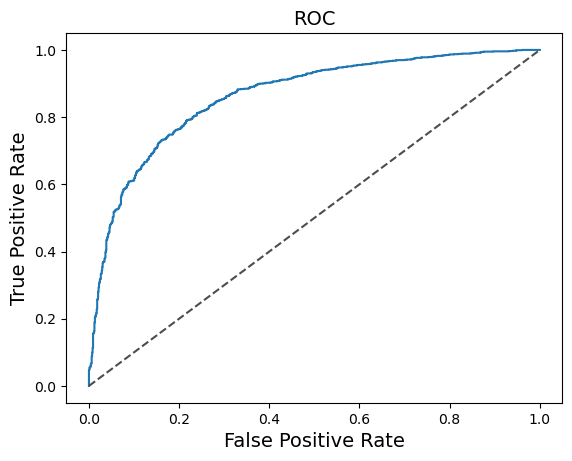

In [115]:
plt.plot( fpr, tpr )
plt.title('ROC', fontdict={'fontsize': 14})
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlabel('False Positive Rate', fontdict={'fontsize': 14})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 14})
plt.show()

#### Вычислим значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [116]:
roc_auc_score(y_test, predictions[:, 1])

0.8623533003362418

#### Реализуем подсчет метрик TPR, FPR с помощью матрицы ошибок и построим визуализацию. 

**TPR (True Positive Rate, доля верных срабатываний)** - отношение числа верных срабатываний к размеру положительного класса:

$$TPR = \frac{TP}{TP+FN}$$

TPR  представляет из себя полноту - сколько раз модель правильно нашла целевой класс.

Данная метрика в идеале должна стремиться к единице.


**FPR (False Positive Rate, доля ложных срабатываний)** - отношение числа ложных срабатываний к общему размеру отрицательного класса:
$$FPR = \frac{FP}{FP+TN}$$

Данная метрика в идеале должна стремиться к нулю.

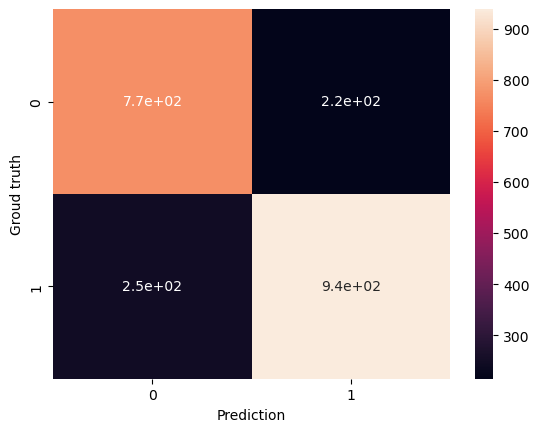

In [117]:
threshold = 0.5
pred = np.where(predictions[:, 1] >= threshold, 1, 0)

cm = confusion_matrix(y_test, pred)
f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

In [118]:
cm

array([[771, 215],
       [248, 938]], dtype=int64)

In [119]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [120]:
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

TPR 0.790893760539629
FPR 0.21805273833671399


#### Реализуем подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [121]:
thresholds = np.arange(0, 1, 0.1)
fprs = []
tprs = []
prs = []
rec = []
pr_custom = []
for threshold in thresholds:
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr2 = tp/(tp + fn)
    fpr2 = fp/(fp + tn)
    precision = tp/(tp + fp)
    recall = tpr2 #по определению
    fprs.append(fpr2)
    tprs.append(tpr2)
    prs.append(precision)
    rec.append(recall)

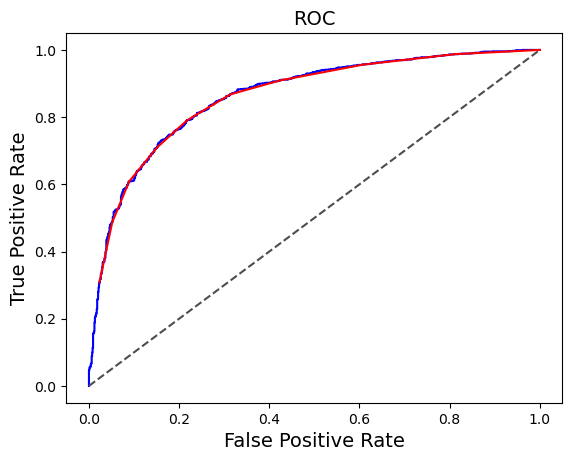

In [122]:
plt.plot( fpr, tpr, color = 'blue' )
plt.plot( fprs, tprs, color = 'red' )
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.title('ROC', fontdict={'fontsize': 14})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 14})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 14})
plt.show()

### Вывод: 
#### Графики библиотечного и ручного подсчета совпадают, поскольку используются одни и теже методв рассчета. В ручную посчитали правильно

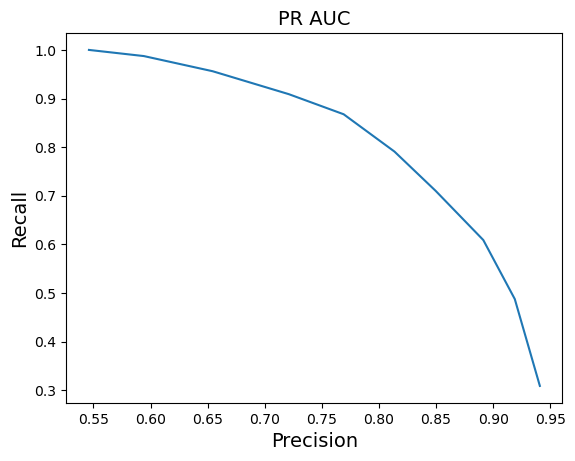

In [123]:
plt.plot(prs, rec)
plt.title('PR AUC', fontdict={'fontsize': 14})
plt.xlabel('Precision', fontdict={'fontsize': 14})
plt.ylabel('Recall', fontdict={'fontsize': 14})
plt.show()

### Выводы по проделанной работе
##### Из графиков видно, что Roc-кривая лежит достаточно далеко от диагонали, и стремится к прямоегольнику. Из этого сделаем вывод, что модель обучилась достаточно зорошо, также мы получили достаточно высокую метрику Roc-AUC = 0.8570759217538069. ROC- кривая может проходить ниже диагонали, но это значит, что перепутаны значения ошибок первого и второго рода и их надо поменять местами. 

# Data Quality

Цель практики: применить на практике методы по оценке качества данных.

In [124]:
# Импрортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib import pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv("D:/GITHUB/Machine_Lerning/Datasets/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Удаляем все пропущенные значения и категориальные переменные. Разделим данные для обучения модели

In [128]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [129]:
data = df[['Survived','Pclass','Age', 'SibSp', 'Parch', 'Fare']]
data = data[pd.isnull(data['Age']) == 0]

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [131]:
X = data[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]

In [132]:
y = data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Разделим выборку на тестовую и обучающую

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Создадим модель с нормализацией данных. Обучим модель

In [134]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [135]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Посчитаем FPR и TPR, построим график, рассчитаем метрику ROC-AUC

In [136]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

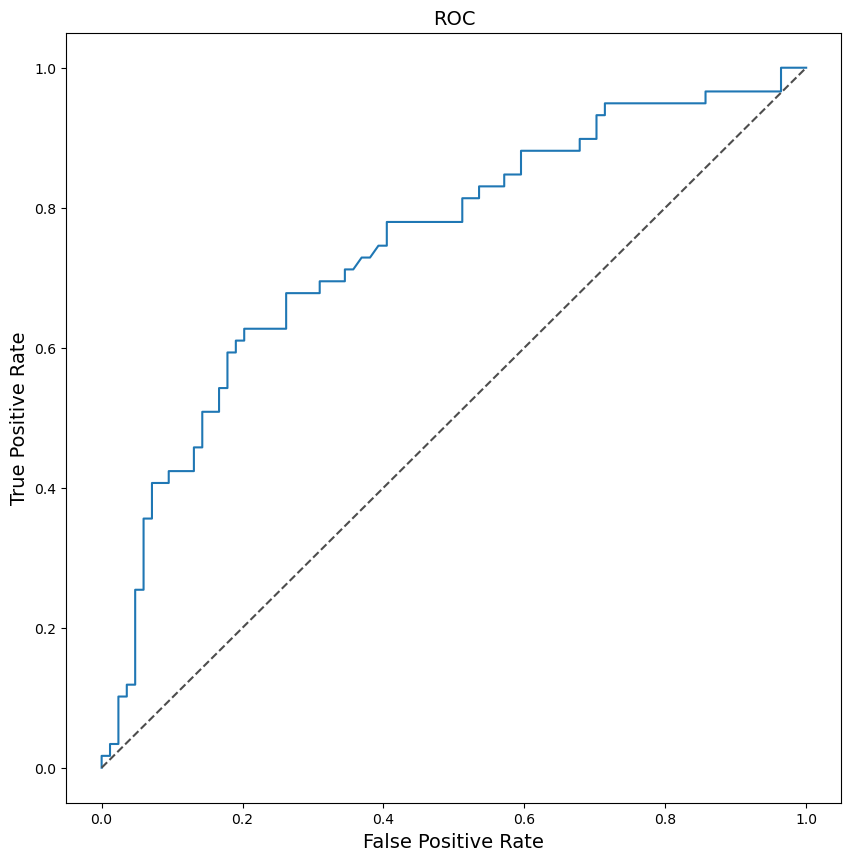

In [137]:
plt.figure(figsize=(10, 10))
plt.plot( fpr, tpr )
plt.title('ROC', fontdict={'fontsize': 14})
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlabel('False Positive Rate', fontdict={'fontsize': 14})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 14})
plt.show()

In [138]:
roc_auc_score(y_test, predictions[:, 1])

0.744955609362389

Снова возьмем полные данные, постараемся улучшить модель

In [139]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Для построения модели не имеют значения имя пасажира, порядковый номер и номер билета. Поэтому не будем использовать их в модели. Номер каюты может влиять на условие выживания пасажира, но этих данных мало и если мы будем использовать этот признак, потеряем 77% данных, где он не заполнен. Не будем его использовать

In [141]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [142]:
data = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

Колонки Age и Embarked содержат пропуски. Посчитаем процент потерь если их просто удалим

In [143]:
data[pd.isnull(data['Embarked'])].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [144]:
print('Процент потерь данных при удалении строк с пустым Embarked ' + str(len(data[pd.isnull(data['Embarked'])])/len(data)*100))
print('Процент потерь данных при удалении строк с пустым Age ' + str(len(data[pd.isnull(data['Age'])])/len(data)*100))

Процент потерь данных при удалении строк с пустым Embarked 0.22446689113355783
Процент потерь данных при удалении строк с пустым Age 19.865319865319865


Заполним пропуски: Age - медианным значением, Embarked - значением с наибольшим значением

In [145]:
# Медианное значение для Age возьмем из описательной статистики датафрейма выше
data.loc[data[data['Age'].isna()].index, 'Age'] = 28

In [146]:
df_port = data.groupby('Embarked').count()['Pclass']
df_port.head()

Embarked
C    168
Q     77
S    644
Name: Pclass, dtype: int64

In [147]:
data.loc[data[data['Embarked'].isna()].index, 'Embarked'] = 'S'

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Преобразуем категориальные признаки

In [149]:
data = pd.get_dummies(data.loc[:, ['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])

In [150]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Проверим данные на наличие выбросов с помощью визуализации boxplot

c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


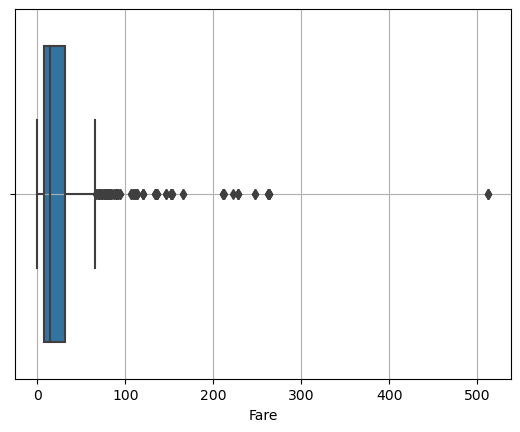

In [151]:
sns.boxplot(data['Fare'])
plt.grid()
plt.show()

c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


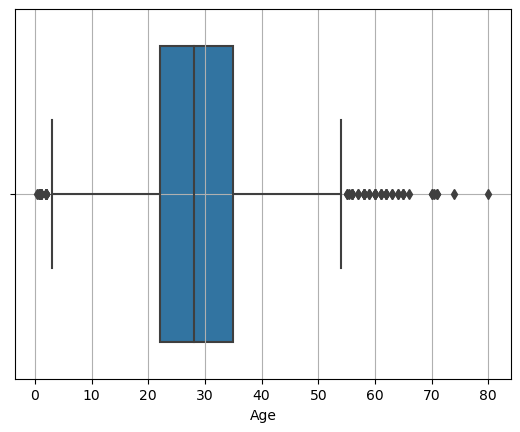

In [152]:
sns.boxplot(data['Age'])
plt.grid();


In [153]:
print(np.where(data['Fare']>300.0))
print(np.where(data['Age']>70.0))

(array([258, 679, 737], dtype=int64),)
(array([ 96, 116, 493, 630, 851], dtype=int64),)


Возраст пассажиров достаточно плотно распределен,хотя на визуализации видно, что пассажиры старше 55лет определяются как выбросы. 5 значений - пассажиры старше 75 лет. Логично что на борту были и старики. Не будем удалять эти данные, оставим для обучения модели. Стоимость билета выше 500$ представляется чистым выбросом. Таких значений 3. Удалим ихи

In [154]:
upper_array = np.where(data['Fare']>300.0)[0]
data.drop(index=upper_array, inplace=True)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    888 non-null    int64  
 1   Pclass      888 non-null    int64  
 2   Age         888 non-null    float64
 3   SibSp       888 non-null    int64  
 4   Parch       888 non-null    int64  
 5   Fare        888 non-null    float64
 6   Sex_female  888 non-null    uint8  
 7   Sex_male    888 non-null    uint8  
 8   Embarked_C  888 non-null    uint8  
 9   Embarked_Q  888 non-null    uint8  
 10  Embarked_S  888 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 52.9 KB


In [156]:
import plotly.express as px
pclass_counts = data.Pclass.value_counts()
fig_pclass_perc = px.pie(data, names= pclass_counts.index, values = pclass_counts.values, title=f'Distribution of Pclass', hole=0.2, color_discrete_sequence=px.colors.sequential.Viridis)
fig_pclass_perc.update_traces(textinfo='percent+label')
fig_pclass_perc.update_layout(legend_title_text='Categories:', legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig_pclass_perc.show()

In [157]:
fig_pclass_surv = px.histogram(data, x = 'Pclass', barmode = 'group', color = 'Survived', color_discrete_sequence=px.colors.sequential.Viridis)
fig_pclass_surv.update_layout(title = 'Survival according to passenger classes', plot_bgcolor = 'white')
fig_pclass_surv.show()

#### Вывод:
Из диаграммы видно, что шансов выжить у пассажиров первого класса было больше, чем у остальных. Но поскольку пассажиров 3-го класса было больше, спаслись примерно одинаковое количество пассажиров

Преобразуем возраст в новый категориальный признак и добавим его в датасет для построения модели

In [158]:
bins = [-np.inf, 17, 32, 45, 50, np.inf]
labels = ["Children", "Young", "Mid-Aged", "Senior-Adult", 'Elderly']
data['Age_Group'] = pd.cut(data['Age'], bins = bins, labels = labels)

In [159]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,Young
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,Mid-Aged
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,Young
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,Mid-Aged
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,Mid-Aged


In [160]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_Group'],
      dtype='object')

In [161]:
X = pd.get_dummies(data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_Group']])

In [162]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group_Children,Age_Group_Young,Age_Group_Mid-Aged,Age_Group_Senior-Adult,Age_Group_Elderly
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0


In [163]:
y = data['Survived']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [165]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [166]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Посчитаем FPR и TPR, построим график, рассчитаем метрику ROC-AUC

In [167]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

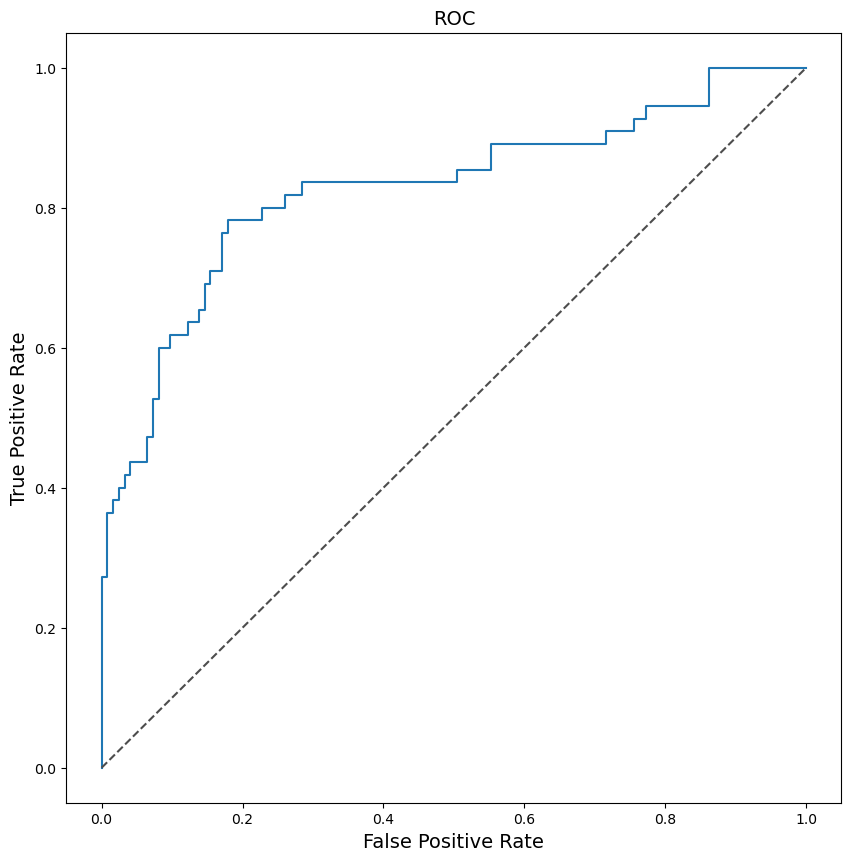

In [168]:
plt.figure(figsize=(10, 10))
plt.plot( fpr, tpr )
plt.title('ROC', fontdict={'fontsize': 14})
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlabel('False Positive Rate', fontdict={'fontsize': 14})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 14})
plt.show()

In [169]:
roc_auc_score(y_test, predictions[:, 1])

0.8266075388026607

### Выводы по проделанной работе:
Для построения второй модели были заполнены пропуски в колонке Age и Embarked, чтобы не потерять 20% данных. Категориальные признаки были переведены в числовые, для использования в модели обучения. Также был создан новый категориальный признак Age_Group, который также участвовал в обучении модели. Удалены аномальные значения (выбросы), которые могли негативно отразиться на качестве модели. 
Результат проделанных преобразований видно из сравнения метрик ROC_AUC:
ROC_AUC = 0.7059 - необработанные данные
ROC_AUC = 0.8173 - данные после обработки
Повышение качества модели на 11%
Работа с данными, преобразование и удаление аномалий позволило существенно улучшить модель. Считаю, что на больших данных таких преобразований нужно делать меньше, поскольку массив для обучения больше и нужно находить оптимальное соотношение качества модели и времени отработки запроса. 

# Features Engineering

Цель практики: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

In [170]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib import pyplot as plt
import seaborn as sns

In [171]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
n_samples, n_features = X.shape

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [173]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


Датафрейм не имеет пропусков

Напишем функцию для модели и расчета метрик RMSE, R2, чтобы оптимизировать код для экспериментов

In [174]:
def get_metrics(X,y, random_seed = 42, model = None):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    return print(f'RMSE_train  {(np.sqrt(mean_squared_error(y_train, y_pred_train))):.3f}\
    R2_train {(r2_score(y_train, y_pred_train)):.3f} \nRMSE_test {(np.sqrt(mean_squared_error(y_test, y_pred_test))):.3f}  \
    R2_test {(r2_score(y_test, y_pred_test)):.3f}')

def get_boxplot(X, columns=[]):
    plt.grid(0.1)
    for i in columns:
        sns.boxplot(x=X[i])
    pass

In [175]:
get_metrics(X,y)

RMSE_train  0.720    R2_train 0.613 
RMSE_test 0.746      R2_test 0.576


In [176]:
y_df = y.to_frame (name='MedHouseVal')


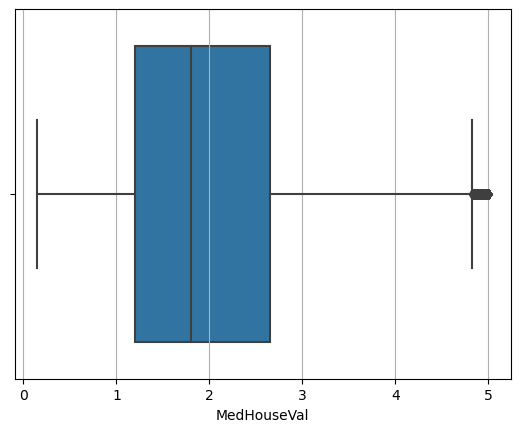

In [177]:
get_boxplot(y_df, ['MedHouseVal'])

In [178]:
y_df[y_df["MedHouseVal"]>4.8].count()

MedHouseVal    1079
dtype: int64

Значения целевой переменной больше 4.8 можно считать выбросами. Таких значений 1079 из 20640

Посчитаем и построим корреляционную матрицу

<AxesSubplot:>

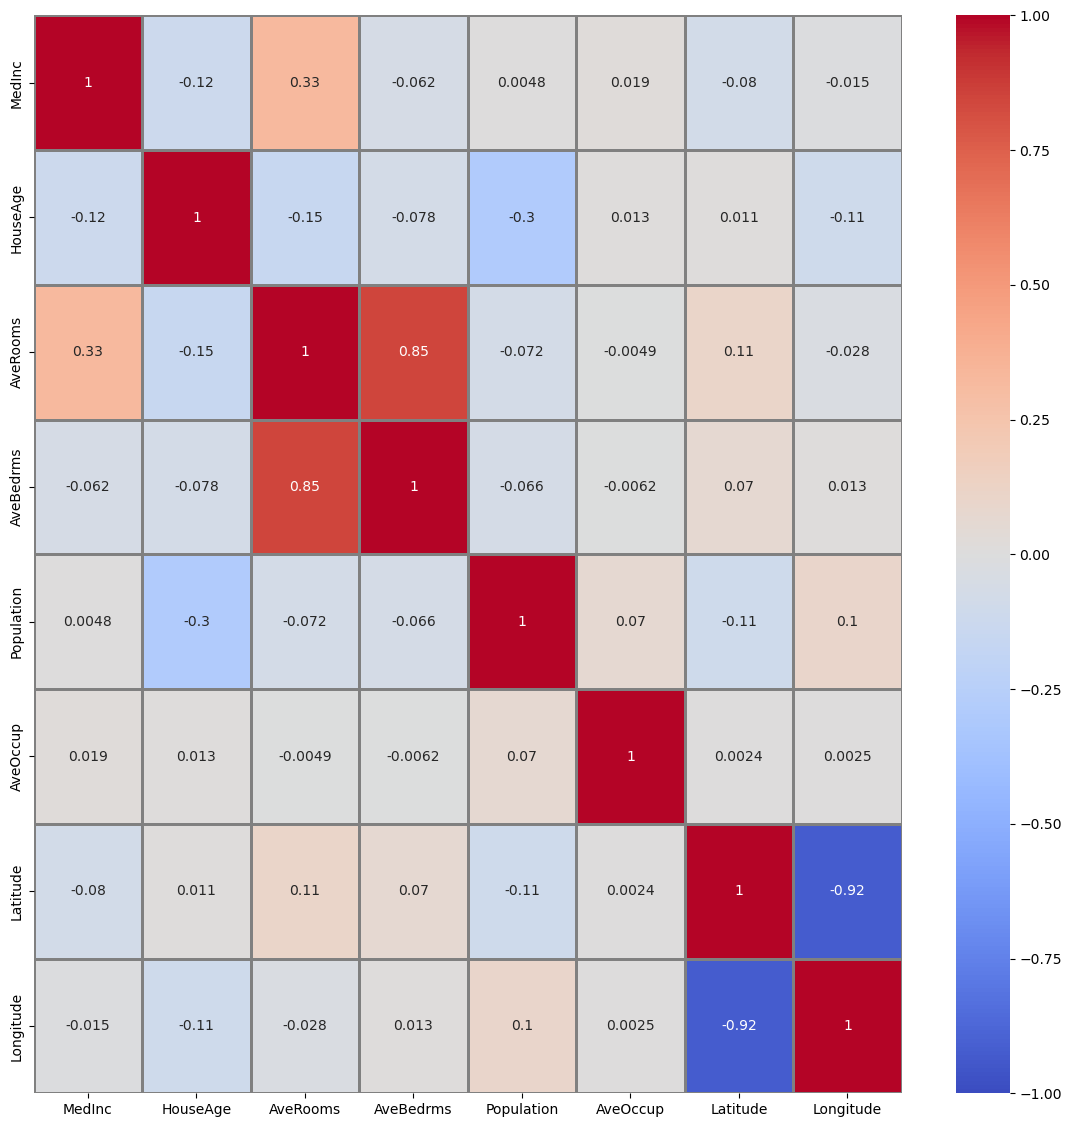

In [179]:
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=1,linecolor='grey', ax=ax)

Наблюдается высокая корреляция 0.85 между AveBedrms и AveRooms. Один из признаков можно удалить

In [180]:
X = X.drop(columns=['AveRooms'])
X.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25


In [181]:
get_metrics(X,y)

RMSE_train  0.727    R2_train 0.604 
RMSE_test 0.742      R2_test 0.580


Удаление одного из признаков с высокой корреляцией не повлияло на эффективность работы модели.

Исследуем другие признаки на выбросы

In [182]:
X.columns

Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

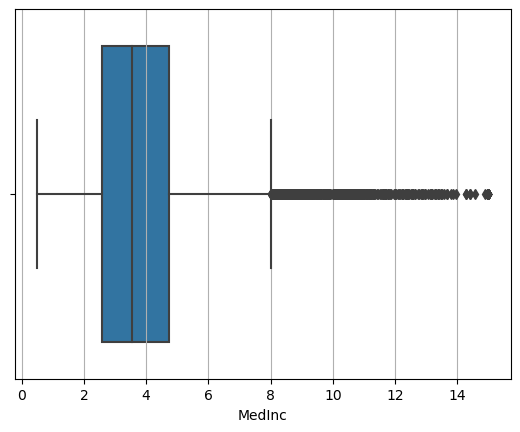

In [183]:
get_boxplot(X, ['MedInc'])

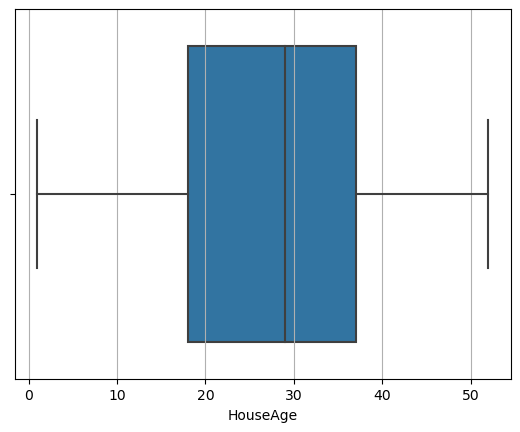

In [184]:
get_boxplot(X, ['HouseAge'])

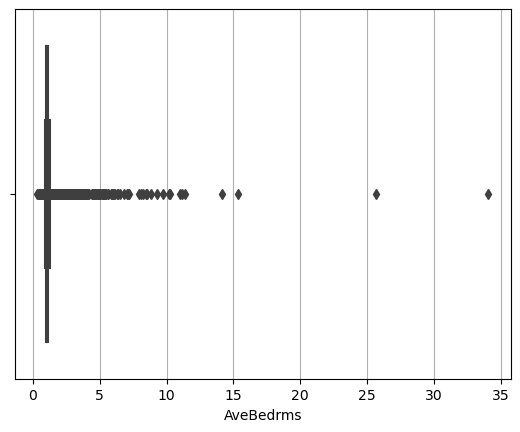

In [185]:
get_boxplot(X, ['AveBedrms'])

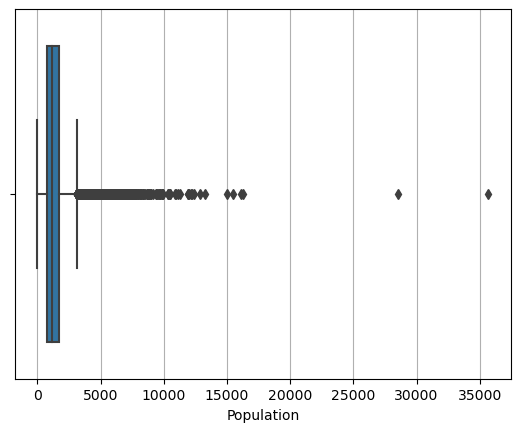

In [186]:
get_boxplot(X, ['Population'])

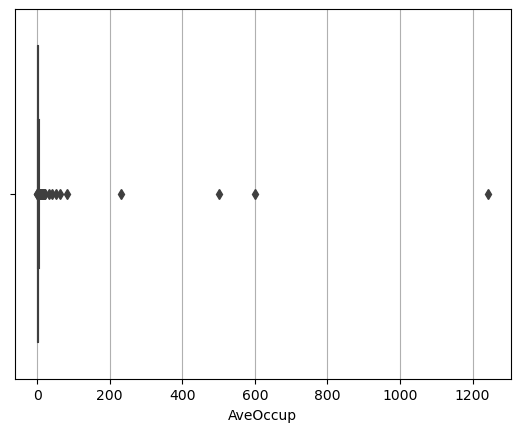

In [187]:
get_boxplot(X, ['AveOccup'])

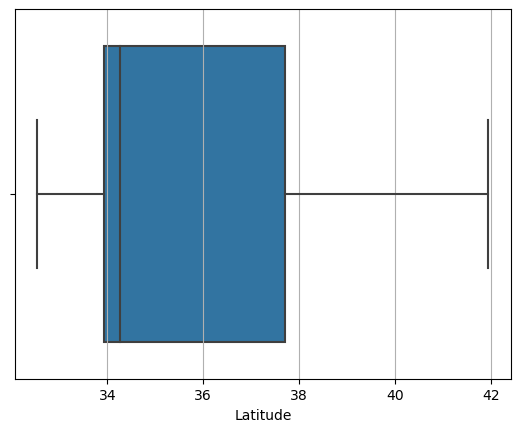

In [188]:
get_boxplot(X, ['Latitude'])

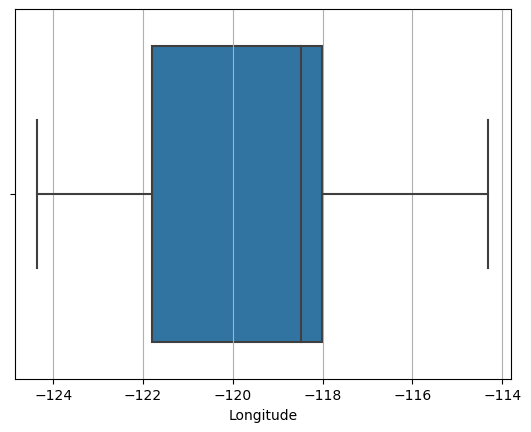

In [189]:
get_boxplot(X, ['Longitude'])

Из EDA признаков видно:
MedInc >14, AveBedrms > 20, Population >15000, AveOccup > 200 - выбросы
 Попробуем поудалять эти выбросы и оценить качество модели


In [190]:
df_to_drop = pd.concat([X,y], axis=1)
df_to_drop.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [191]:
df_to_drop = df_to_drop[(df_to_drop['MedInc'] < 14) ]
df_to_drop = df_to_drop[(df_to_drop['AveBedrms'] < 20)]
df_to_drop = df_to_drop[(df_to_drop['Population'] < 15000)]
df_to_drop = df_to_drop[(df_to_drop['AveOccup'] < 200)]
df_to_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20571 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20571 non-null  float64
 1   HouseAge     20571 non-null  float64
 2   AveBedrms    20571 non-null  float64
 3   Population   20571 non-null  float64
 4   AveOccup     20571 non-null  float64
 5   Latitude     20571 non-null  float64
 6   Longitude    20571 non-null  float64
 7   MedHouseVal  20571 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [192]:
X = df_to_drop.loc[:, (df_to_drop.columns != "MedHouseVal")]
y = df_to_drop['MedHouseVal']

In [193]:
get_metrics(X,y)

RMSE_train  0.709    R2_train 0.617 
RMSE_test 0.692      R2_test 0.634


Изменим некоторые признаки математически

In [194]:
X['Population'] = np.log(X['Population'])
X['HouseAge'] = np.sqrt(X['HouseAge'])

C:\Users\lokky\AppData\Local\Temp\ipykernel_27516\248101857.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lokky\AppData\Local\Temp\ipykernel_27516\248101857.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [195]:
get_metrics(X,y)

RMSE_train  0.710    R2_train 0.616 
RMSE_test 0.694      R2_test 0.632


### Выводы:
В ходе работы с данными проведен EDA, на основе которого были удален один из коррелирующих признаков, удалены выбросы, проведены математические преобразования признаков. Получены следующие результаты: 
| Модель            |RMSE_train|R2_train | RMSE_test | R2_test |
|-------------------|:--------:|:-------:|:---------:|:-------:|
| Чистые данные     |0.720     | 0.613   | 0.746     | 0.576   |
|Удален признак     |0.727     | 0.604   | 0.742     | 0.580   |
|Удалены выбросы    |0.709     | 0.617   | 0.692     | 0.634   |
|Мат. преобразования|0.710     |0.616    |0.694      | 0.632   |

По результатам видно, что при работе с данными, незначительно, но удалось улучшить качество модели.
По моему мнению обучение на данном датасете показало кдовлетворительное качество, модели нехватило признаков для поиска более значимых зависимостей. 



# Decision Tree

Цель Практики: изучить применение дерева решений в рамках задачи регрессии

In [196]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns

In [197]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
n_samples, n_features = X.shape

In [198]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [199]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Данные не содержат пропусков, используем весь датасет для обучения

In [200]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Нормализуем признак HouseAge

In [201]:
from sklearn import preprocessing
x_array = np.array(X['HouseAge'])
normalized_arr = preprocessing.normalize([x_array])

In [202]:
X['HouseAge'] = normalized_arr[0]

In [203]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,0.009123,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,0.004673,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,0.011570,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,0.011570,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,0.011570,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [204]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,0.006372,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,0.002800,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,0.000223,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,0.004005,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,0.006453,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,0.008233,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,0.011570,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [205]:
from sklearn.tree import plot_tree

In [206]:
def get_score(X,y, random_seed=100, model=None, depth=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    if model is None:
        model = LinearRegression()
        model.fit(X_train,y_train)
        return model.score(X_test,y_test)
    if model == 'Decision_Tree':
        if depth is None:
            regr = DecisionTreeRegressor(max_depth=3)
            regr.fit(X_train,y_train)
            plt.figure(figsize=(20, 12))
            _ = tree.plot_tree(regr, feature_names=X.columns, filled=True)
            model = DecisionTreeRegressor()
            model.fit(X_train,y_train)
            return model.score(X_test,y_test)
        else:
            regr = DecisionTreeRegressor(max_depth=depth)
            model = regr.fit(X_train,y_train)
            return model.score(X_test,y_test)
           
    

Рассчитаем метрику для Логистической регрессии

In [207]:
get_score(X,y)

0.6223138107294217

Обучим Дерево Решений и рассчитаем метрику

0.6386028046128595

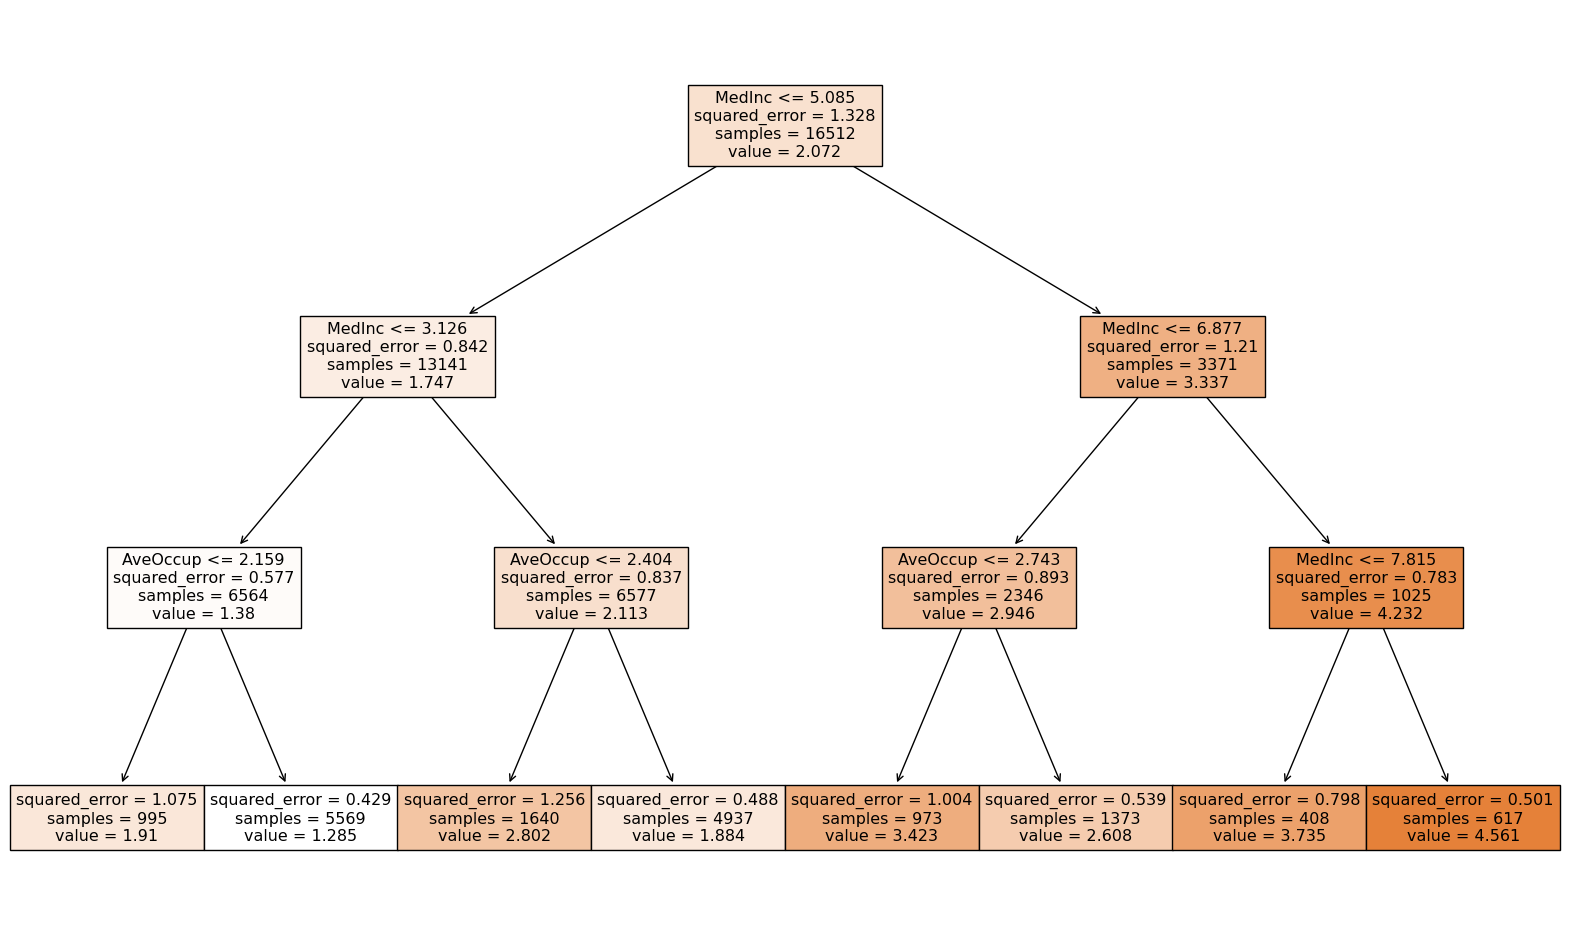

In [208]:
get_score(X,y, model = 'Decision_Tree')

Оптимизируем глубину дерева (max_depth) и посчитаем метрику на разных глубинах

In [209]:
list_depth = [3,4,5,7,8,9,10,11,12]
for i in list_depth:
    res = get_score(X,y, model = 'Decision_Tree', depth=i)
    print(str(i)+'____'+str(res))

3____0.5365091443015421
4____0.5841150459144939
5____0.631598536765779
7____0.6896351468174157
8____0.7124701999629202
9____0.7214256422114136
10____0.7071527370114299
11____0.6936839269726612
12____0.7013454666519825


Проверим, какие из признаков наиболее важные для дерева решений

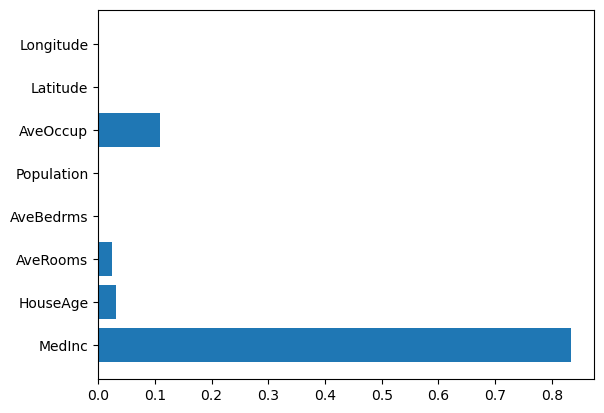

In [210]:
regr = DecisionTreeRegressor(max_depth=4)
regr.fit(X,y)

plt.barh(np.arange(len(regr.feature_importances_)), regr.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

Попробуем поработать с признаками и улучшить качество модели. По результатам EDA из предыдущей практики удалим один из коррелирующих признаков AveBedrms, удалим ненужныйй признак Population, очистим датасет от выбросов, нормализуем признаки MedInc, AveOccup 

In [211]:
X_opt = X.drop(columns=['AveBedrms', 'Population'])
X_opt.head()

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude
0,8.3252,0.009123,6.984127,2.555556,37.88,-122.23
1,8.3014,0.004673,6.238137,2.109842,37.86,-122.22
2,7.2574,0.011570,8.288136,2.802260,37.85,-122.24
3,5.6431,0.011570,5.817352,2.547945,37.85,-122.25
4,3.8462,0.011570,6.281853,2.181467,37.85,-122.25


In [212]:
df_to_drop = pd.concat([X_opt,y], axis=1)
df_to_drop.head()

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,0.009123,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,0.004673,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,0.011570,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,0.011570,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,0.011570,6.281853,2.181467,37.85,-122.25,3.422


c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='AveRooms'>

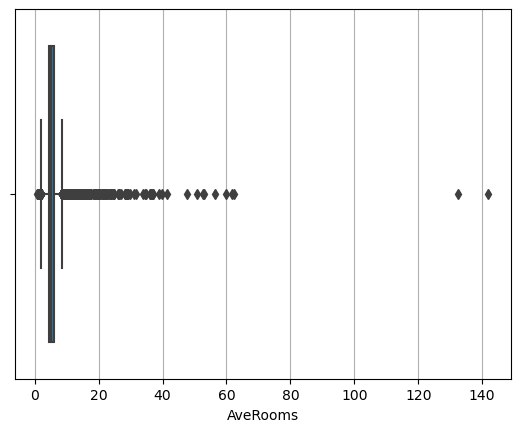

In [213]:
plt.grid()
sns.boxplot(X_opt['AveRooms'])

In [214]:
df_to_drop = df_to_drop[(df_to_drop['MedInc'] < 14) ]
df_to_drop = df_to_drop[(df_to_drop['AveRooms'] < 42)]
df_to_drop = df_to_drop[(df_to_drop['AveOccup'] < 200)]
df_to_drop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20569 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20569 non-null  float64
 1   HouseAge     20569 non-null  float64
 2   AveRooms     20569 non-null  float64
 3   AveOccup     20569 non-null  float64
 4   Latitude     20569 non-null  float64
 5   Longitude    20569 non-null  float64
 6   MedHouseVal  20569 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [215]:
df_to_drop.describe()

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,MedHouseVal
count,20569.000000,20569.000000,20569.000000,20569.000000,20569.000000,20569.000000,20569.000000
mean,3.839826,0.006366,5.386884,2.946042,35.631408,-119.569450,2.060765
std,1.810380,0.002798,1.848264,1.220772,2.136205,2.004098,1.145465
min,0.499900,0.000223,0.846154,0.692308,32.540000,-124.350000,0.149990
25%,2.562500,0.004005,4.438114,2.429194,33.930000,-121.800000,1.194000
50%,3.531300,0.006453,5.224868,2.818049,34.260000,-118.490000,1.794000
75%,4.733000,0.008233,6.042193,3.282270,37.710000,-118.010000,2.639000
max,13.947000,0.011570,41.333333,83.171429,41.950000,-114.310000,5.000010


In [216]:
X_proc = df_to_drop.loc[:, (df_to_drop.columns != "MedHouseVal")]
y = df_to_drop['MedHouseVal']

In [217]:
x_array = np.array(X_proc['MedInc'])
normalized_arr = preprocessing.normalize([x_array])

In [218]:
X_proc['MedInc'] = normalized_arr[0]

C:\Users\lokky\AppData\Local\Temp\ipykernel_27516\3326026303.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [219]:
x_array = np.array(X_proc['AveOccup'])
normalized_arr = preprocessing.normalize([x_array])

In [220]:
X_proc['AveOccup'] = normalized_arr[0]

C:\Users\lokky\AppData\Local\Temp\ipykernel_27516\2250226199.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [221]:
X_proc.describe()

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude
count,20569.000000,20569.000000,20569.000000,20569.000000,20569.000000,20569.000000
mean,0.006307,0.006366,5.386884,0.006441,35.631408,-119.569450
std,0.002973,0.002798,1.848264,0.002669,2.136205,2.004098
min,0.000821,0.000223,0.846154,0.001514,32.540000,-124.350000
25%,0.004209,0.004005,4.438114,0.005311,33.930000,-121.800000
50%,0.005800,0.006453,5.224868,0.006162,34.260000,-118.490000
75%,0.007774,0.008233,6.042193,0.007177,37.710000,-118.010000
max,0.022908,0.011570,41.333333,0.181853,41.950000,-114.310000


Обучим заново наши модели

In [222]:
#Логистическая регрессия
get_score(X_proc,y)

0.59193622297121

0.6293049598869773

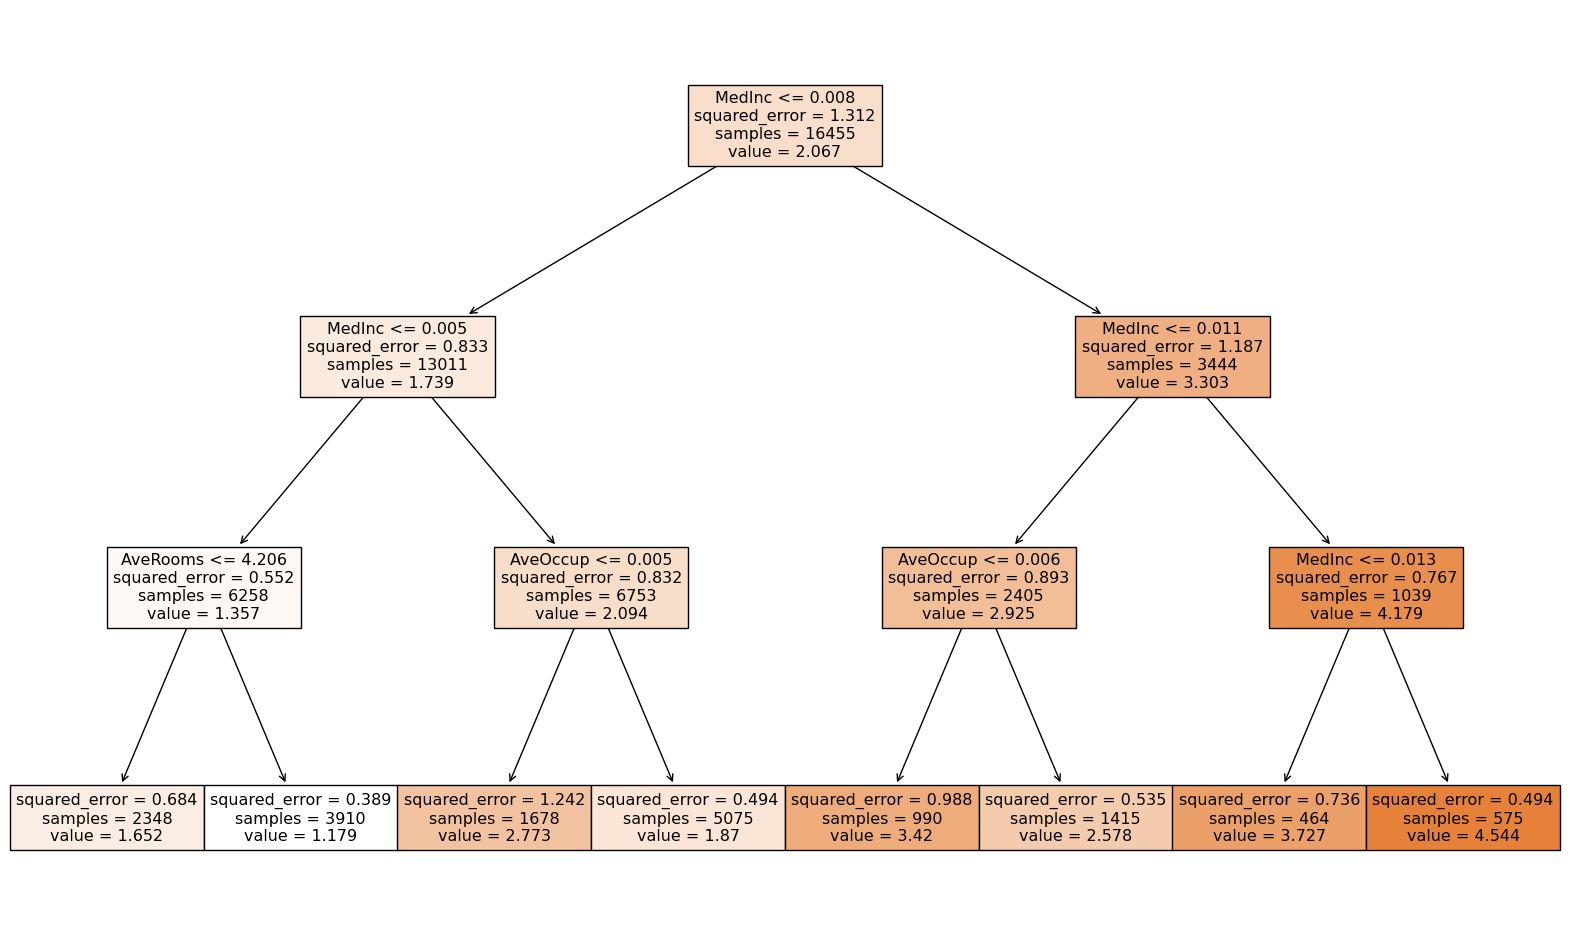

In [223]:
#Дерево решений
get_score(X_proc,y, model = 'Decision_Tree')

In [224]:
list_depth = [3,4,5,7,8,9,10,11,12]
for i in list_depth:
    res =get_score(X_proc,y, model = 'Decision_Tree', depth=i)
    print(str(i)+'____'+str(res))


3____0.5041109403503102
4____0.5418469985995746
5____0.5785542913331481
7____0.6528426176249625
8____0.686157092424502
9____0.7083375620566394
10____0.702095849956504
11____0.6959208331800786
12____0.6888636992508426


### Вывод:
Дерево решений показывает качество выше чем линейная регрессия, существенно помогает поднять метрику оптимизация глубины дерева. На 9 уровне модель показывает лучший показатель. Оптимизация и нормализация данных в данной работе не пренесли желаемого результата, возможно модель упростилась и поэтому не показала лучшей обучаемости. Необходимо более глубоко работать с инжинерингом признаков

# Ensemble

In [225]:
! pip install kaggle

In [226]:
import pandas as pd
import kaggle
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns


In [227]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset             Customer Shopping Trends Dataset                    146KB  2023-10-05 06:45:37          11960        264  1.0              
zeesolver/consumer-behavior-and-shopping-habits-dataset        Consumer Behavior and Shopping Habits Dataset:      146KB  2023-10-19 13:36:26           1706         33  1.0              
nelgiriyewithana/billionaires-statistics-dataset               Billionaires Statistics Dataset (2023)              139KB  2023-09-29 13:39:28           6241        161  1.0              
nelgiriyewithana/top-spotify-songs-2023                        Mo

In [228]:
! kaggle datasets download -d fedesoriano/heart-failure-prediction

heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [229]:
from zipfile import ZipFile
zipfile = 'heart-failure-prediction.zip'
z = ZipFile(zipfile)
z.infolist()

[<ZipInfo filename='heart.csv' compress_type=deflate file_size=35921 compress_size=8606>]

In [230]:
import shutil
shutil.unpack_archive('heart-failure-prediction.zip', 'd:\GITHUB\Machine_Lerning\Datasets')

In [231]:
data =pd.read_csv('d:\GITHUB\Machine_Lerning\Datasets\heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [233]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [234]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [235]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [236]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [237]:
df_proces = pd.get_dummies(data.loc[:,['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']], drop_first=True)

In [238]:
df_proces.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


### EDA

Построим гистограмму зависимости заболевания в разрезе пола

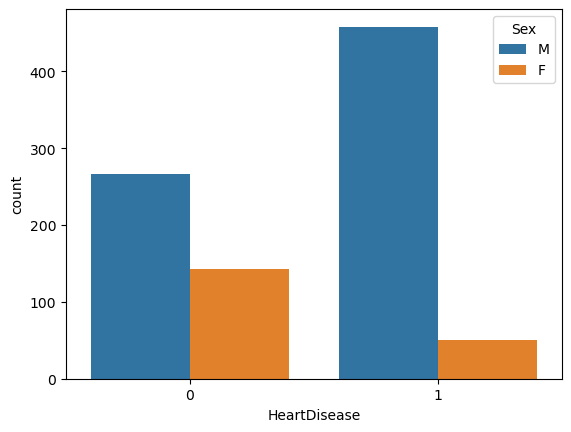

In [239]:
sns.countplot(data=data, x='HeartDisease',hue='Sex')
plt.show()

Построим точечные графики зависимостей с учетом пола пациента

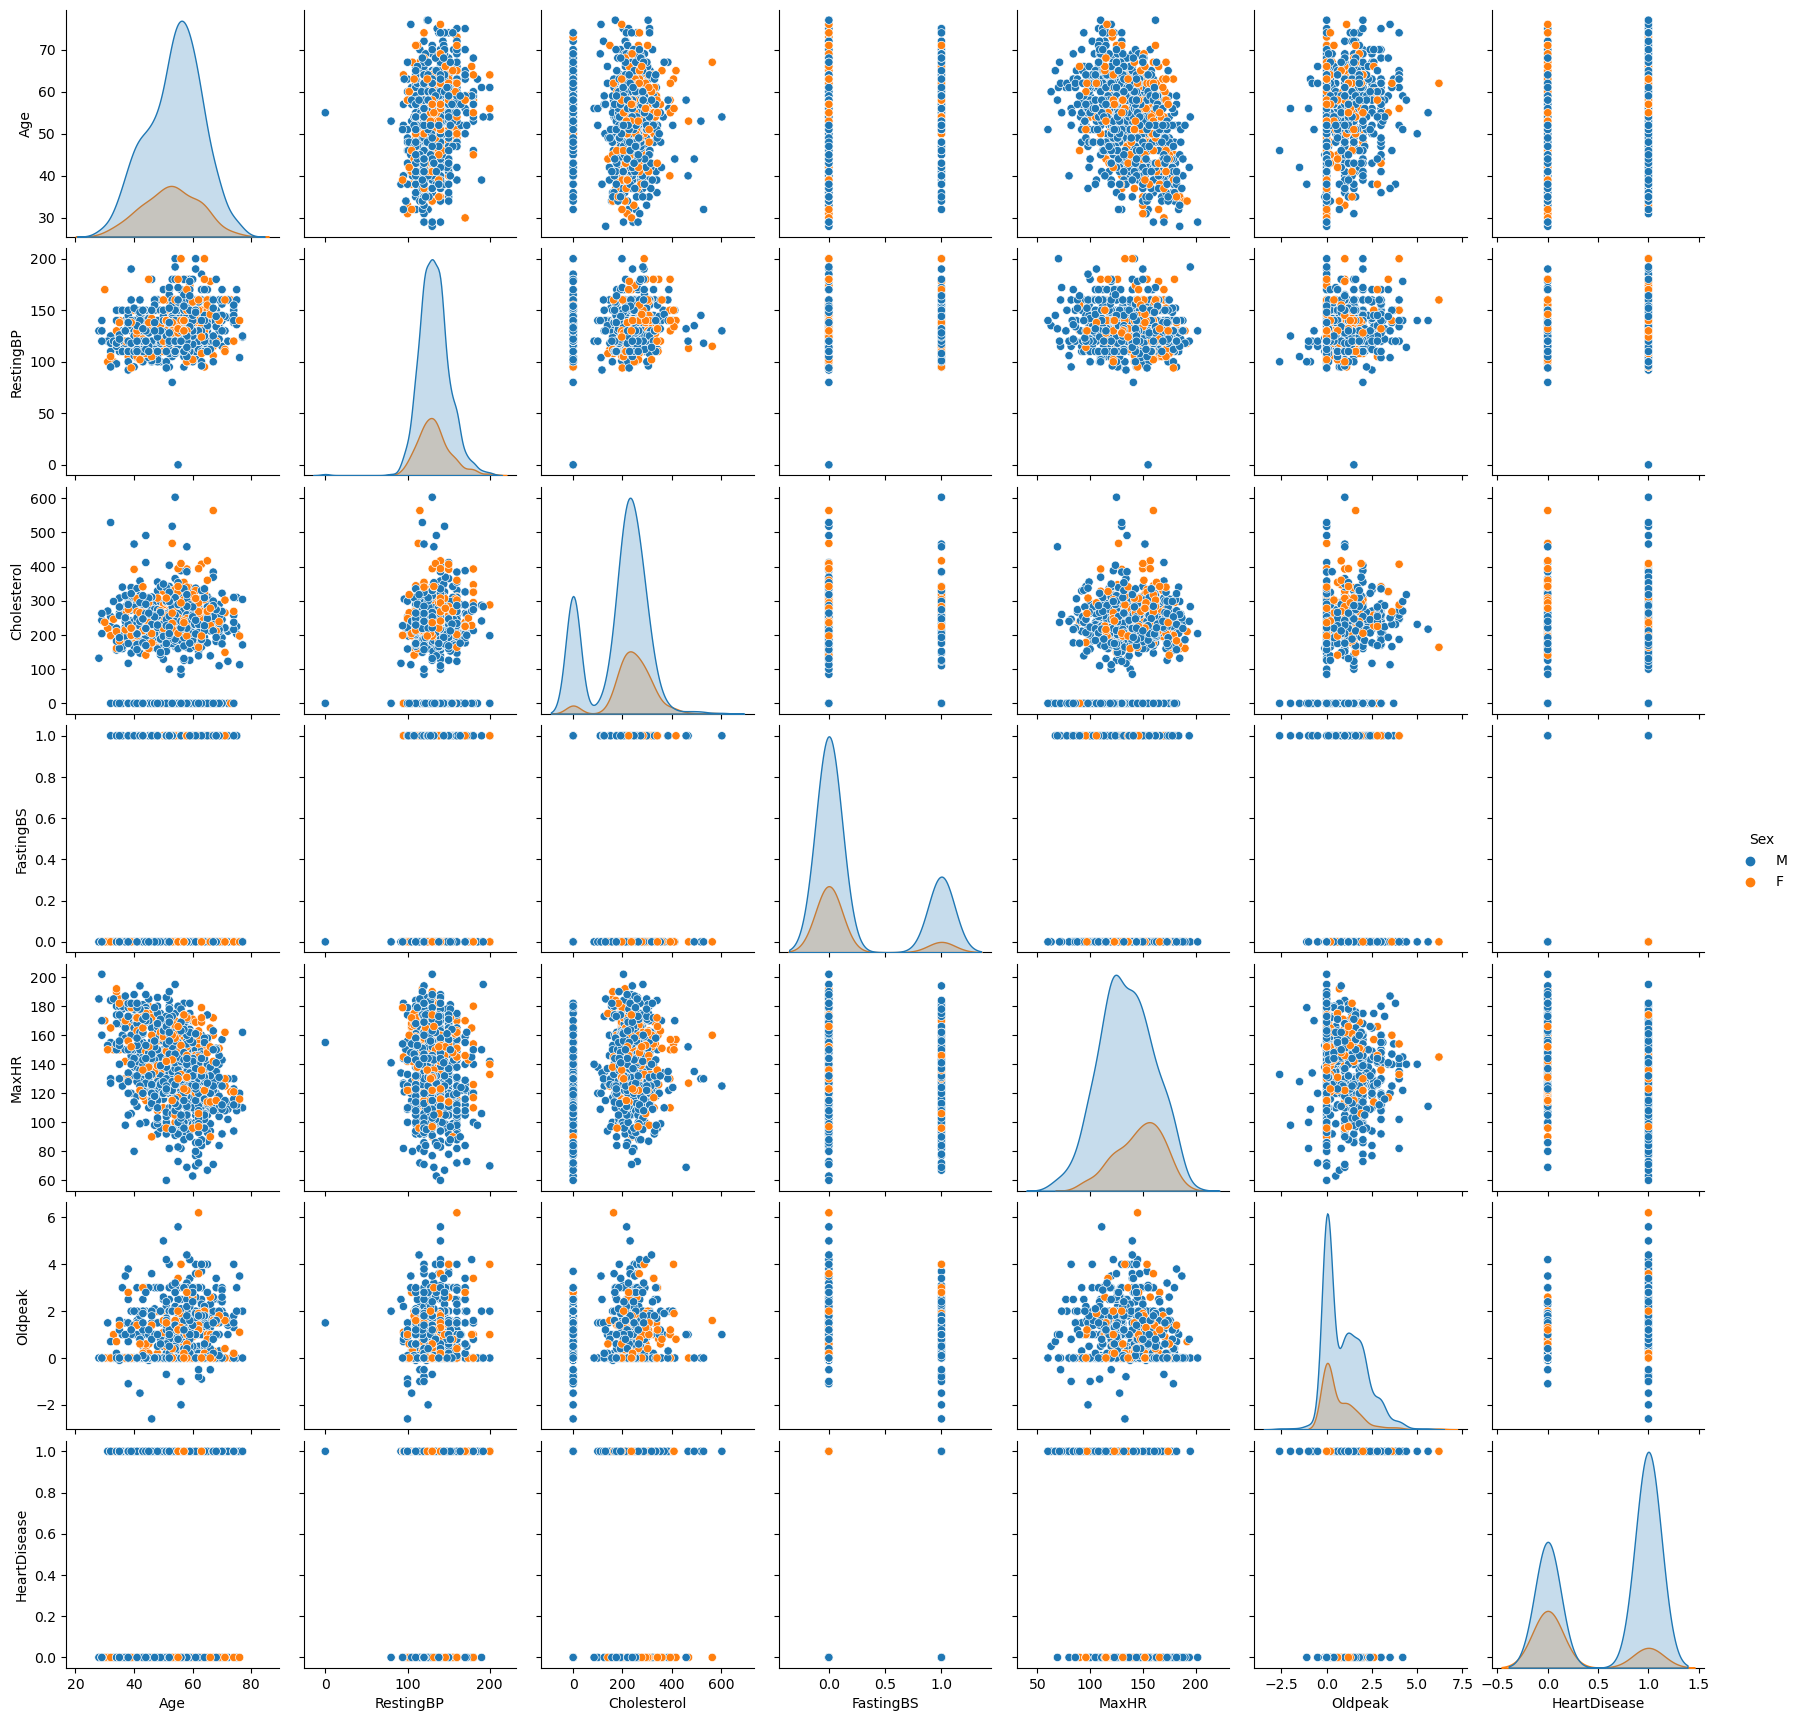

In [240]:
sns.pairplot(data=data, hue = 'Sex');

In [241]:
X_train, X_test, y_train, y_test = train_test_split(df_proces.drop(columns=['HeartDisease']), df_proces['HeartDisease'], test_size=0.2, random_state=42 )

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

### Обучим модель DecisionTreeClassifier

In [286]:
dtc = DecisionTreeClassifier(random_state=1)

In [287]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [288]:
dtc.score(X_train, y_train)

1.0

In [289]:
y_pred = dtc.predict(X_test)

In [290]:
target_names = ['HeartDisease_N', 'HeartDisease_Y']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

HeartDisease_N       0.82      0.82      0.82        77
HeartDisease_Y       0.87      0.87      0.87       107

      accuracy                           0.85       184
     macro avg       0.84      0.84      0.84       184
  weighted avg       0.85      0.85      0.85       184



### Обучим модель RandomForestClassifier

In [291]:
rfc = RandomForestClassifier(random_state=10)

In [292]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [293]:
rfc.score(X_train, y_train)

1.0

In [294]:
y_pred = rfc.predict(X_test)

In [295]:
target_names = ['HeartDisease_N', 'HeartDisease_Y']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

HeartDisease_N       0.82      0.83      0.83        77
HeartDisease_Y       0.88      0.87      0.87       107

      accuracy                           0.85       184
     macro avg       0.85      0.85      0.85       184
  weighted avg       0.85      0.85      0.85       184



In [296]:
imp = pd.Series(rfc.feature_importances_)
imp.index = pd.Series(X_train.columns)

In [297]:
imp = imp.sort_values(ascending=True)
imp

ChestPainType_TA     0.008607
RestingECG_ST        0.009902
RestingECG_Normal    0.015343
FastingBS            0.022393
ChestPainType_NAP    0.026139
Sex_M                0.036346
ChestPainType_ATA    0.038009
RestingBP            0.066948
Age                  0.083882
Cholesterol          0.095684
MaxHR                0.104544
ExerciseAngina_Y     0.108013
ST_Slope_Flat        0.119483
Oldpeak              0.128952
ST_Slope_Up          0.135754
dtype: float64

Выводим все признаки отсортированные по важности. Чтобы диаграма была читаемой, построим барчарт вместо столбчатой диаграммы

<BarContainer object of 15 artists>

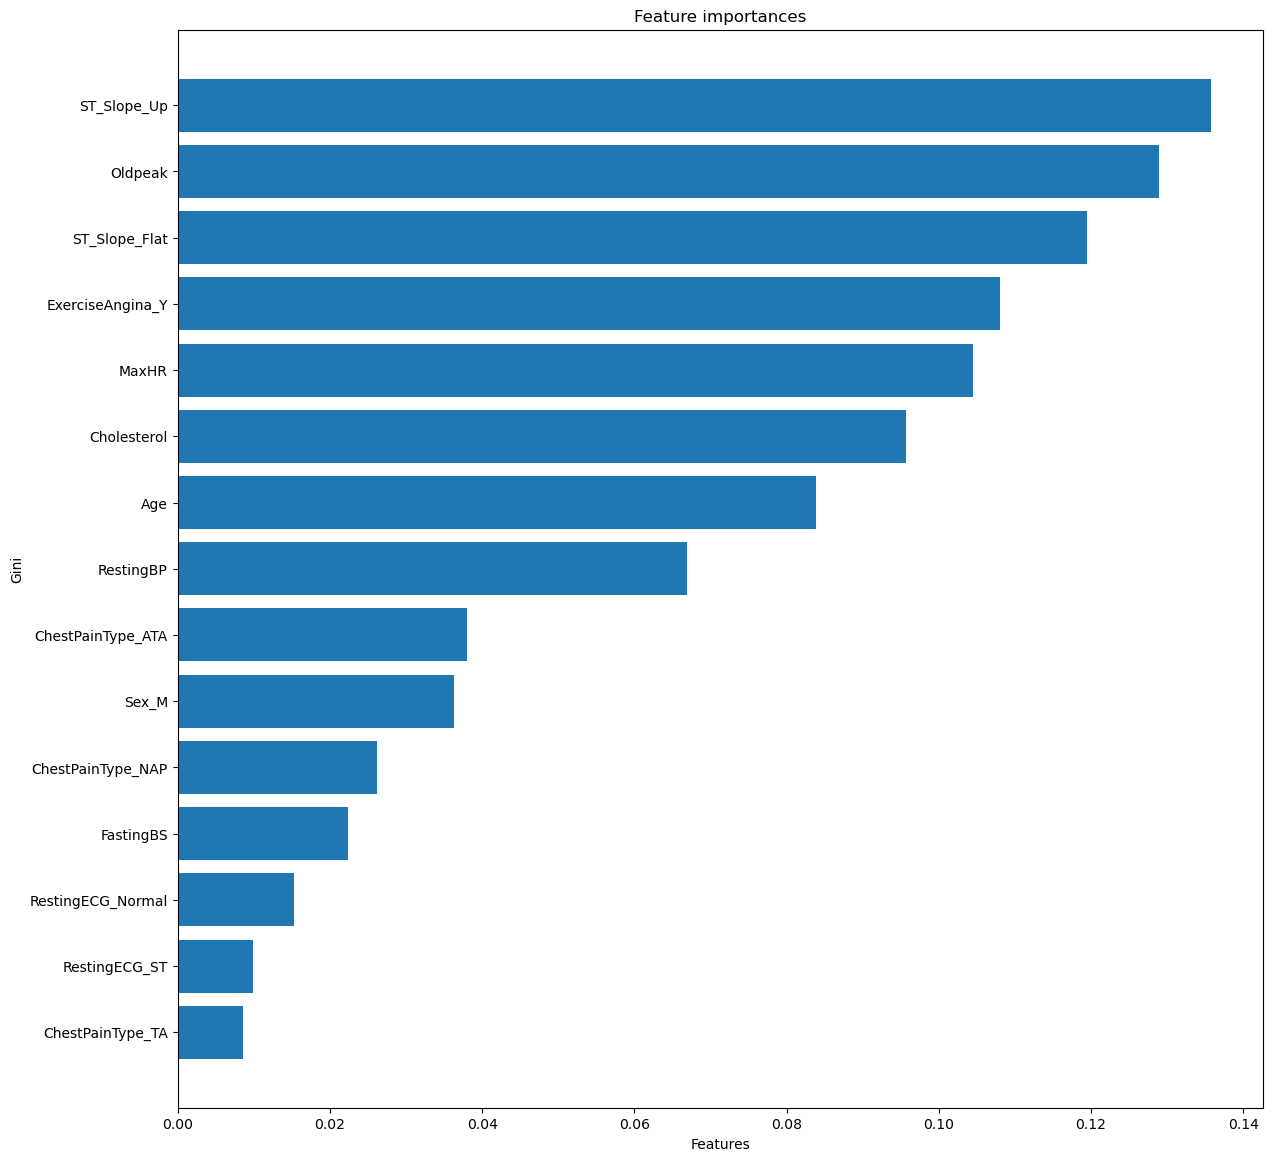

In [298]:
fig, ax = plt.subplots(figsize=(14,14))
plt.title('Feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.barh(imp.index, imp)

### Бэггинг

In [299]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=10,
                            max_samples=0.5,
                            max_features=0.5,
                            random_state=10)

In [300]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, random_state=10)

In [301]:
bagging.score(X_train, y_train)

0.9536784741144414

In [302]:
y_pred = bagging.predict(X_test)

In [303]:
target_names = ['HeartDisease_N', 'HeartDisease_Y']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

HeartDisease_N       0.73      0.87      0.79        77
HeartDisease_Y       0.89      0.77      0.82       107

      accuracy                           0.81       184
     macro avg       0.81      0.82      0.81       184
  weighted avg       0.82      0.81      0.81       184



### Стекинг

In [304]:
estimators = [
        ('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('LinearSVC', make_pipeline(StandardScaler(), SVC()))]
Regressor = StackingClassifier(estimators=estimators)

In [305]:
Regressor.fit(X_train,y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('LinearSVC',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc', SVC())]))])

In [306]:
print(f'Score on train  {Regressor.score(X_train, y_train)}')
print(f'Score on test  {Regressor.score(X_test, y_test)}')

Score on train  0.9291553133514986
Score on test  0.875


In [307]:
y_pred = Regressor.predict(X_test)

In [308]:
target_names = ['HeartDisease_N', 'HeartDisease_Y']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

HeartDisease_N       0.84      0.87      0.85        77
HeartDisease_Y       0.90      0.88      0.89       107

      accuracy                           0.88       184
     macro avg       0.87      0.87      0.87       184
  weighted avg       0.88      0.88      0.88       184



In [309]:
for i in Regressor.named_estimators:
    print(f'Score on train  with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model DecisionTreeClassifier 1.0
Score on test  with model DecisionTreeClassifier 0.8586956521739131
Score on train  with model RandomForestClassifier 1.0
Score on test  with model RandomForestClassifier 0.8641304347826086
Score on train  with model LinearSVC 0.9100817438692098
Score on test  with model LinearSVC 0.875


### Выводы
Из проделанной работы видно что деревья решений переобучаются. Беггинг также не очень хорошосправился с задачей: Recall для HeartDisease_Y ниже всез моделей, это значит есть увеличивается вероятность пропустить пациента с заболеванием. Лучше всего с задачей справился Стекинг. Из трех алгоритмов лучше всего отработал SVC. Деревья переобучились. 